In [20]:
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

Load annotations

In [21]:
with open('./grs/lexicons/subcat/common_predicates_anno1.lp') as f:
    anno1_lines = f.readlines()
with open('./grs/lexicons/subcat/common_predicates_anno2.lp') as f:
    anno2_lines = f.readlines()

In [52]:
senses = [line.split('\t')[1] for line in anno1_lines]
anno1_data = [line.strip().split('\t')[2:] for line in anno1_lines]
anno2_data = [line.strip().split('\t')[2:] for line in anno2_lines]

# By predicate

In [23]:
for ind_pred, pred in enumerate(anno1_data):
    for ind_arg, arg in reversed(list(enumerate(pred))):
        if arg.strip() == '-' and anno2_data[ind_pred][ind_arg].strip() == '-':
            anno1_data[ind_pred].pop(ind_arg)
            anno2_data[ind_pred].pop(ind_arg)

anno1 = []
for pred in anno1_data:
    anno1.append([[item] for item in pred])

anno2 = []
for pred in anno2_data:
    anno2.append([[item] for item in pred])

In [24]:
scores = []
for ind, sense in enumerate(senses):
    score = cohen_kappa_score(anno1[ind], anno2[ind])
    if math.isnan(score):
        score = 1.0
    scores.append((sense, score))

In [25]:
sum(i[1] for i in scores)/len(scores)
# print(scores[0])

0.6400276492630754

In [26]:
scores

[('abhor-01', 1.0),
 ('abide-01', 1.0),
 ('ablate-01', 0.6923076923076923),
 ('abnegate-01', 1.0),
 ('abolish-01', 1.0),
 ('accord-03', 0.5714285714285714),
 ('account-01', 1.0),
 ('accountable-02', 1.0),
 ('accredit-01', 1.0),
 ('accrete-01', 1.0),
 ('advert-01', 0.33333333333333337),
 ('advertise-01', 1.0),
 ('advise-01', 0.25),
 ('advocate-01', 0.25),
 ('affair-01', 0.33333333333333337),
 ('aggravate-01', 1.0),
 ('aggregate-01', 0.5714285714285714),
 ('aggrieve-01', 1.0),
 ('agitate-01', 1.0),
 ('agonize-01', 1.0),
 ('alarm-01', 1.0),
 ('alcoholize-01', 0.5714285714285714),
 ('alert-01', 0.25),
 ('alert-02', 0.0),
 ('alien-01', 0.0),
 ('allay-01', 0.33333333333333337),
 ('allege-01', 0.4285714285714286),
 ('allergic-01', 1.0),
 ('alleviate-01', 0.0),
 ('alligator-01', 1.0),
 ('attempt-01', 1.0),
 ('attend-01', 1.0),
 ('attend-02', 1.0),
 ('attenuate-01', 1.0),
 ('attest-01', 1.0),
 ('bear-06', 1.0),
 ('bear-out-05', 0.33333333333333337),
 ('bear-up-04', 1.0),
 ('beard-01', 1.0),
 ('

# By argument

In [53]:
# for i in range(len(anno1_data)):
l = [[anno1_data[i][0]] for i in range(len(anno1_data)) if not (anno1_data[i][0] == '-' and
                                                                anno2_data[i][0]=='-')]

print(len(anno1_data))
print(l)

anno1_by_arg = []
anno2_by_arg = []
for j in range(10):
    print(j)
    anno1_by_arg.append([[anno1_data[i][j]] for i in range(len(anno1_data)) if not (anno1_data[i][j] == '-' and
                                                                anno2_data[i][j]=='-')])
    anno2_by_arg.append([[anno2_data[i][j]] for i in range(len(anno2_data)) if not (anno1_data[i][j] == '-' and
                                                                anno2_data[i][j]=='-')])
    

497
[['experiencer'], ['agent'], ['agent'], ['agent'], ['agent'], ['actor1'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['stimulus'], ['agent'], ['stimulus'], ['stimulus'], ['stimulus'], ['cause'], ['agent'], ['agent'], ['agent'], ['agent'], ['actor'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['location'], ['agent'], ['agent'], ['actor'], ['actor'], ['agent'], ['cause'], ['patient'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['experiencer'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['actor'], ['actor'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['stimulus'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['agent'], ['cause'], ['agent'], ['agent'], ['agent'], ['actor'], ['agent'], ['agent'], ['agent'], ['age

In [54]:
scores_by_arg = []
for i in range(10):
    score = cohen_kappa_score(anno1_by_arg[i], anno2_by_arg[i])
#     if math.isnan(score):
#         score = 1.0
    scores_by_arg.append(('arg'+str(i), score, len(anno1_by_arg[i])))

In [55]:
scores_by_arg

[('arg0', 0.43348558378532676, 441),
 ('arg1', 0.5555828436102096, 478),
 ('arg2', 0.6006629263026654, 268),
 ('arg3', 0.7065649867374005, 59),
 ('arg4', 0.7446808510638298, 24),
 ('arg5', 1.0, 3),
 ('arg6', nan, 0),
 ('arg7', nan, 0),
 ('arg8', nan, 0),
 ('arg9', nan, 0)]

In [56]:
sum(i[1] for i in scores_by_arg if not math.isnan(i[1]))/6

0.6734961985832387

# Confusion Matrix

In [57]:
anno1_arg0_list = [anno1_data[i][0] for i in range(len(anno1_data)) if not (anno1_data[i][0] == '-' and
                                                                anno2_data[i][0]=='-')]

anno2_arg0_list = [anno2_data[i][0] for i in range(len(anno2_data)) if not (anno1_data[i][0] == '-' and
                                                                anno2_data[i][0]=='-')]

labels = sorted(list(set(anno1_arg0_list + anno2_arg0_list)))
# labels


arg0_conf_mat = confusion_matrix(anno1_arg0_list, anno2_arg0_list, labels)

In [58]:
labels

['actor',
 'actor1',
 'agent',
 'cause',
 'experiencer',
 'location',
 'patient',
 'patient1',
 'source',
 'stimulus',
 'theme',
 'theme1',
 'topic']

In [59]:
arg0_conf_mat

array([[  7,   0,  23,   2,   0,   0,   0,   0,   0,   3,   0,   0,   0],
       [  0,   2,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 12,   2, 289,   1,   7,   0,   0,   0,   0,   1,   0,   0,   0],
       [ 14,   0,  19,   6,   0,   0,   0,   0,   1,   3,   1,   0,   0],
       [  1,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   5,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   0,   0,   0,   0,   0,  14,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

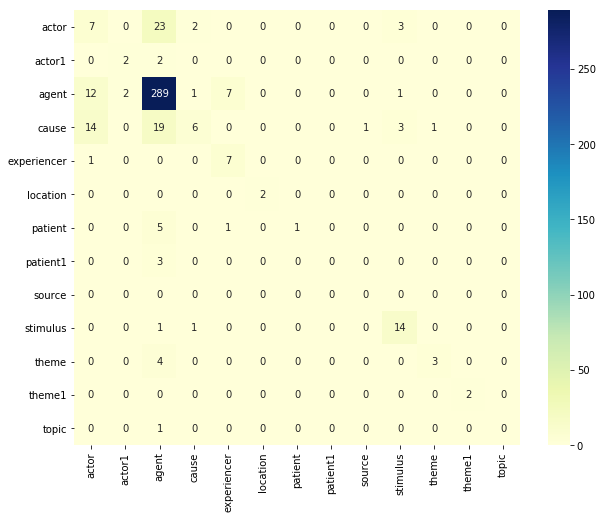

In [60]:
fig, ax = plt.subplots(figsize=[10,8])
ax = sns.heatmap(arg0_conf_mat, annot=True, cmap="YlGnBu", fmt='g', xticklabels=labels, yticklabels=labels)
ax.figure.savefig('heatmap_arg0')

### ARG1

In [61]:
# print(len(anno1_data))
# print(len(anno2_data))
print(anno1_data)

anno1_arg0_list = [anno1_data[i][1] for i in range(len(anno1_data)) if not (anno1_data[i][1] == '-' and
                                                                anno2_data[i][1]=='-')]

anno2_arg0_list = [anno2_data[i][1] for i in range(len(anno2_data)) if not (anno1_data[i][1] == '-' and
                                                                anno2_data[i][1]=='-')]

labels = sorted(list(set(anno1_arg0_list + anno2_arg0_list)))
# labels


arg1_conf_mat = confusion_matrix(anno1_arg0_list, anno2_arg0_list, labels)

[['experiencer', 'stimulus', '-', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', '-', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', 'patient', 'instrument', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', 'beneficiary', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', '-', '-', '-', '-', '-', '-', '-', '-'], ['actor1', 'theme', 'actor2', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', 'instrument', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', 'actor', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'patient', 'attribute', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'material', '-', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'beneficiary', '-', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', '-', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'patient', 'theme', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'theme', 'patient', '-', '-', '-', '-', '-', '-', '-'], ['agent', 'actor', '-', '-', '-', '-', '-', '-', '-', '-'], ['stimulus', 'e

In [62]:
arg1_conf_mat

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0],
      

In [63]:
labels

['actor',
 'actor1',
 'actor2',
 'agent',
 'asset',
 'attribute',
 'beneficiary',
 'cause',
 'destination',
 'experiencer',
 'extent',
 'location',
 'material',
 'patient',
 'patient1',
 'patient2',
 'predicate',
 'product',
 'recipient',
 'source',
 'stimulus',
 'theme',
 'theme1',
 'theme2',
 'topic']

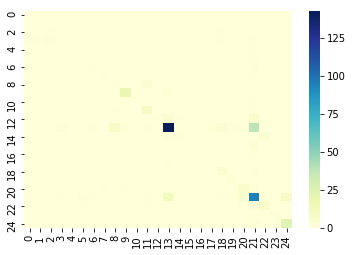

In [64]:
ax = sns.heatmap(arg1_conf_mat, cmap="YlGnBu")

### ARG2

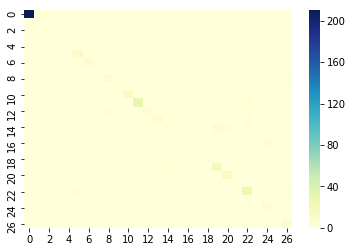

In [65]:
anno1_arg0_list = [anno1_data[i][2] for i in range(len(anno1_data)) if not (anno1_data[i][1] == '-' and
                                                                anno2_data[i][2]=='-')]

anno2_arg0_list = [anno2_data[i][2] for i in range(len(anno2_data)) if not (anno1_data[i][1] == '-' and
                                                                anno2_data[i][2]=='-')]

labels = sorted(list(set(anno1_arg0_list + anno2_arg0_list)))
# labels


arg2_conf_mat = confusion_matrix(anno1_arg0_list, anno2_arg0_list, labels)

ax = sns.heatmap(arg2_conf_mat, cmap="YlGnBu")

# All args

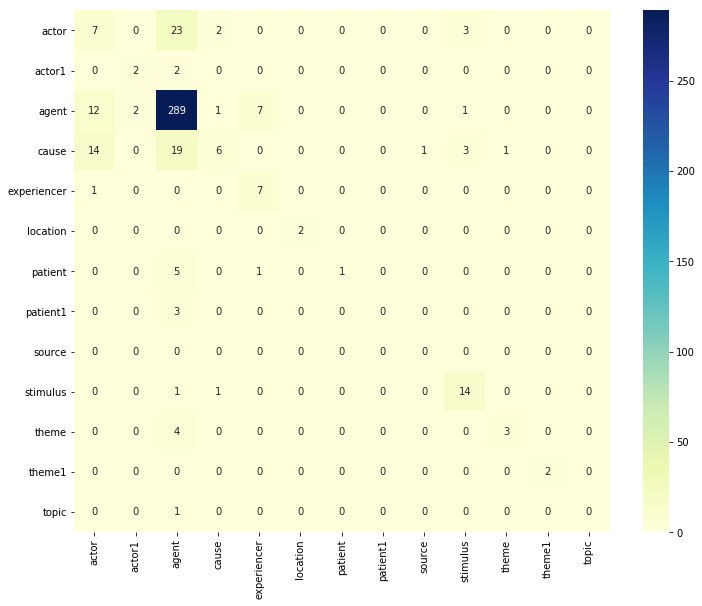

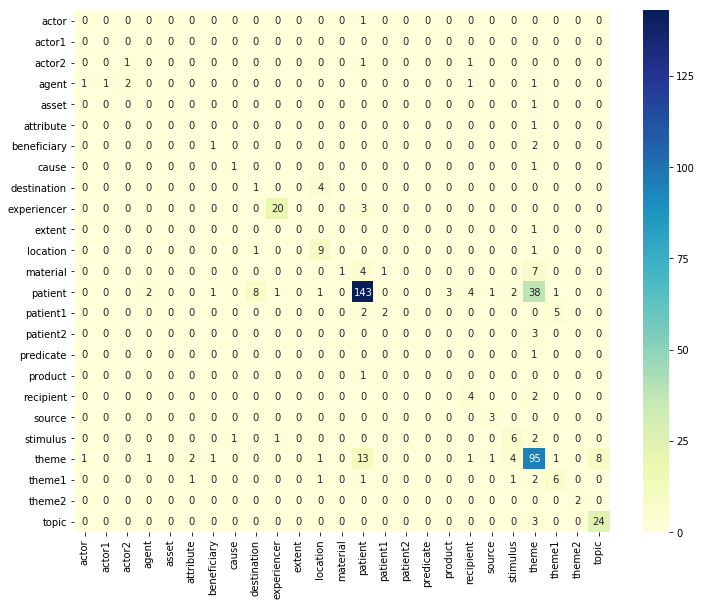

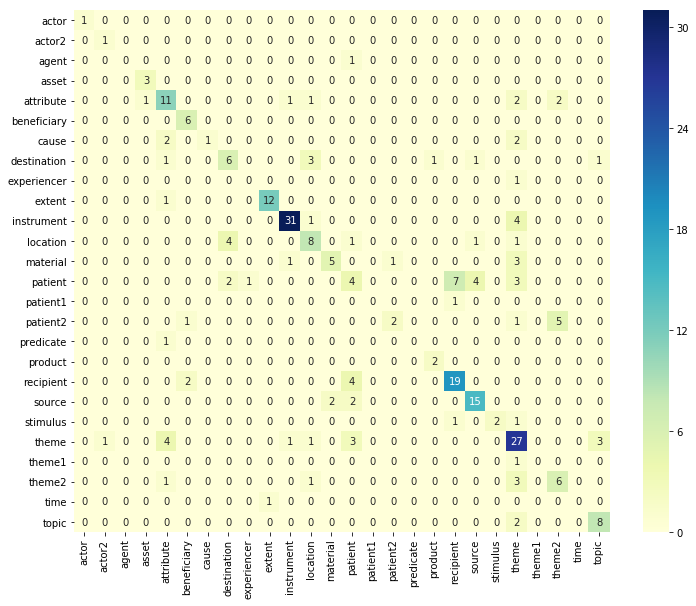

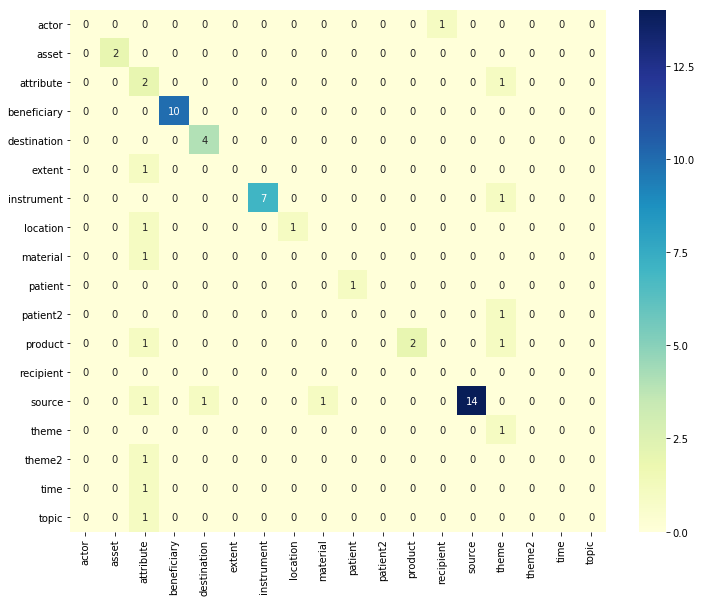

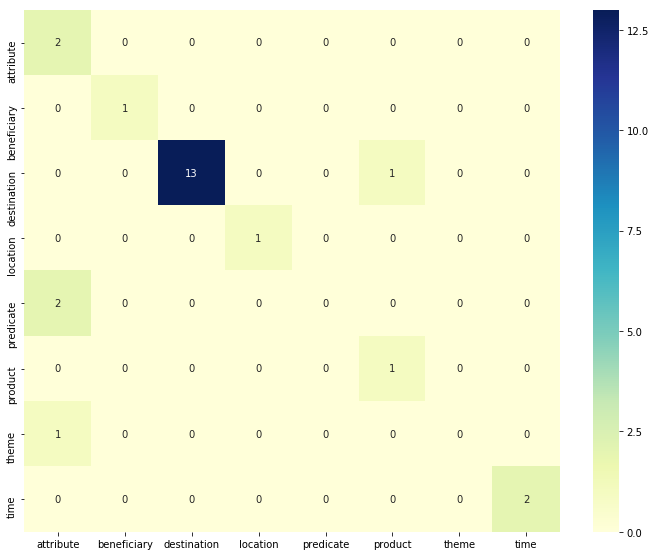

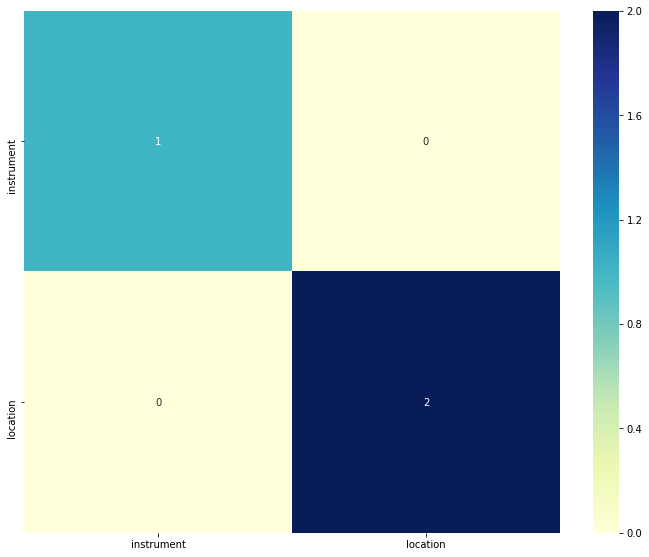

In [66]:
for j in range(6):
    anno1_arg_list = [anno1_data[i][j] for i in range(len(anno1_data)) if not (anno1_data[i][j] == '-' and
                                                                anno2_data[i][j]=='-')]

    anno2_arg_list = [anno2_data[i][j] for i in range(len(anno2_data)) if not (anno1_data[i][j] == '-' and
                                                                    anno2_data[i][j]=='-')]

    labels = sorted(list(set(anno1_arg_list + anno2_arg_list)))
    # labels


    arg_conf_mat = confusion_matrix(anno1_arg_list, anno2_arg_list, labels)
    fig, ax = plt.subplots(figsize=[12,9.6])
    ax = sns.heatmap(arg_conf_mat, annot=True, cmap="YlGnBu", fmt='g', xticklabels=labels, yticklabels=labels)
    ax.figure.savefig('heatmap_arg'+str(j))

# Flattened

In [71]:
anno1_all = []
anno2_all = []
for j in range(10):
#     print(j)
    anno1_all += [[anno1_data[i][j]] for i in range(len(anno1_data)) if not (anno1_data[i][j] == '-' and
                                                                anno2_data[i][j]=='-')]
    anno2_all += [[anno2_data[i][j]] for i in range(len(anno2_data)) if not (anno1_data[i][j] == '-' and
                                                                anno2_data[i][j]=='-')]
len(anno1_all)

1273

In [72]:
score = cohen_kappa_score(anno1_all, anno2_all)

In [73]:
score

0.6533258821243322

In [79]:
labels = sorted(list(set([i[0] for i in anno1_all + anno2_all])))

In [83]:
labels

['actor',
 'actor1',
 'actor2',
 'agent',
 'asset',
 'attribute',
 'beneficiary',
 'cause',
 'destination',
 'experiencer',
 'extent',
 'instrument',
 'location',
 'material',
 'patient',
 'patient1',
 'patient2',
 'predicate',
 'product',
 'recipient',
 'source',
 'stimulus',
 'theme',
 'theme1',
 'theme2',
 'time',
 'topic']

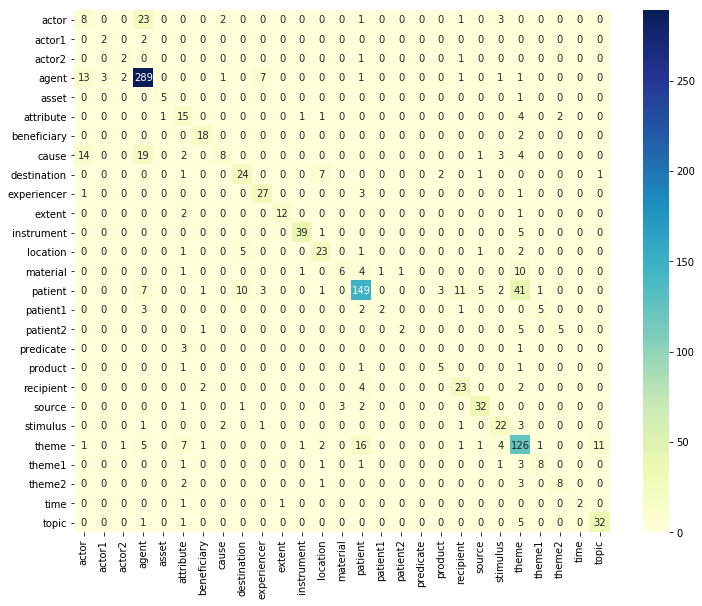

In [84]:
arg_conf_mat = confusion_matrix(anno1_all, anno2_all, labels)
fig, ax = plt.subplots(figsize=[12,9.6])
ax = sns.heatmap(arg_conf_mat, annot=True, cmap="YlGnBu", fmt='g', xticklabels=labels, yticklabels=labels)
ax.figure.savefig('heatmap_all')